<a href="https://colab.research.google.com/github/tharindatj/Kaggle_competitions/blob/backup/kaggle_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the start off modules and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.set_index('Id', inplace=True)

Initial Scan of Data

In [3]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

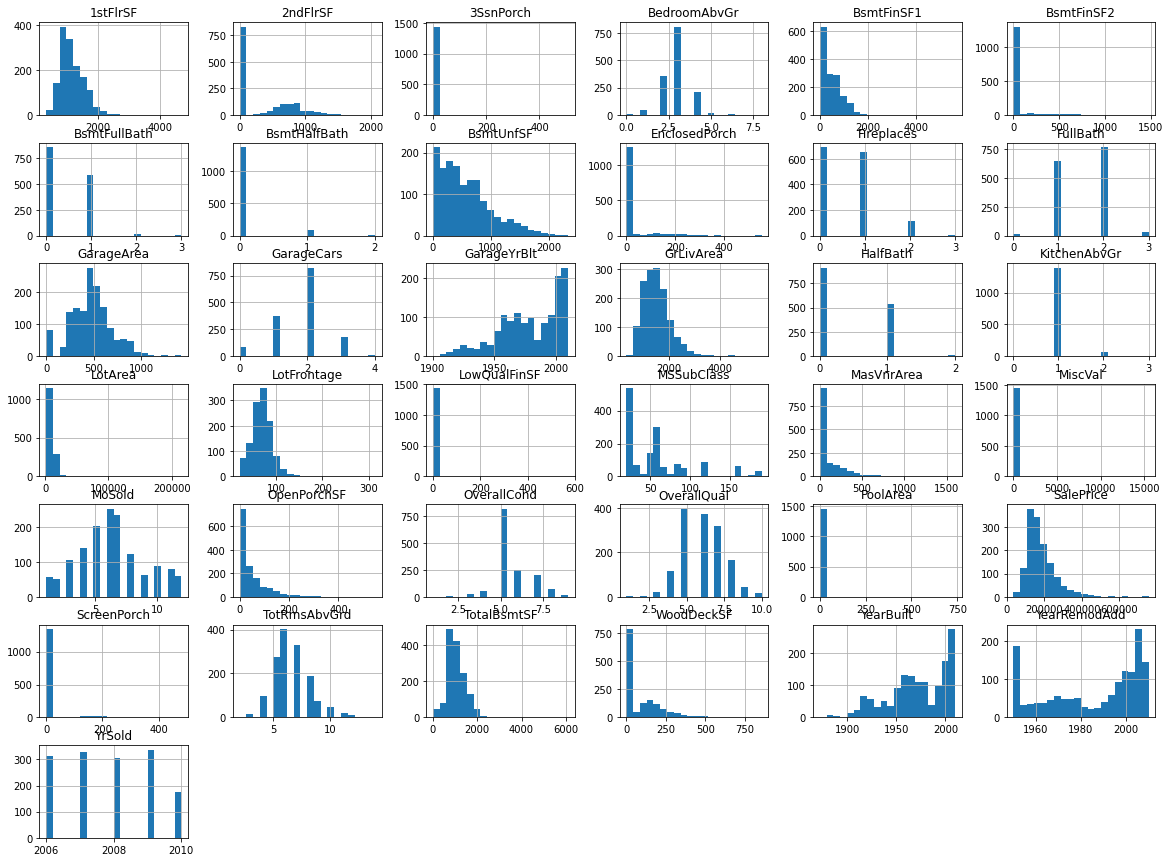

In [6]:
df.hist(bins=20, figsize=(20,15))
plt.show()

*Understand what data is missing and decide on strategy*

In [7]:
df_empty = df.columns[df.isnull().any()]

In [8]:
df_empty = df[df_empty]

In [9]:
df_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [10]:
df_empty.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


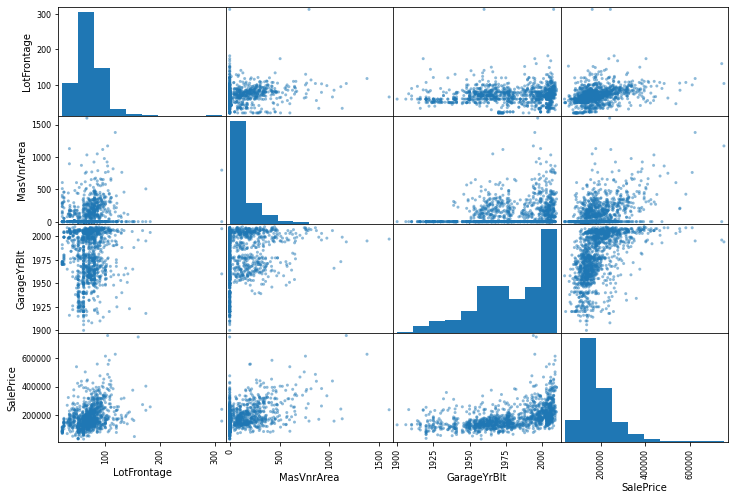

In [11]:
from pandas.plotting import scatter_matrix
df_empty = df_empty.join(df['SalePrice'])
scatter_matrix(df_empty, figsize=(12,8), diagonal='hist')
plt.show()

In [12]:
#missing values strategy
#na means absence of option in house - custom transformer
na_cat = ['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

#for numerical empty values strategy=Median
median =['LotFrontage']

#for numerical empty values strategy=Constant
#GaragYrBlt, use oldest year = 1900 to enable adding feature - age of garage - no garage means zero age
constant = ['GarageYrBlt'] 

#for numerical and catetgorical variables stratege =most frequent
frequent_cat = ['MasVnrType','Electrical']
frequent_num = ['MasVnrArea']

#check all missing features are addressed
empty_cat_columns = na_cat + frequent_cat
all_missing_feat = empty_cat_columns + median + constant + frequent_num
len(all_missing_feat) == len(df_empty.columns) -1

True

In [13]:
#fill in empty data to facilitate data evaluation
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

df_fillempty = ColumnTransformer([('median', SimpleImputer(strategy='median'), median),
                                        ('constant', SimpleImputer(strategy='constant', fill_value=1900), constant),
                                        ('frequent', SimpleImputer(strategy='most_frequent'), frequent_num),
                                        ('na', SimpleImputer(strategy='constant', fill_value='na'),na_cat),
                                        ('cat_frequent', SimpleImputer(strategy='most_frequent'), frequent_cat)], 
                                       remainder='passthrough')

In [14]:
df_fill = df_fillempty.fit_transform(df)

In [15]:
fill_columns = ['LotFrontage','GarageYrBlt','MasVnrArea','Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MasVnrType','Electrical']
column_list = list(df.columns)
passthrough_columns = [i for i in column_list if i not in fill_columns]
df_fill_columns = fill_columns + passthrough_columns

In [16]:
df_fill = pd.DataFrame(df_fill, columns=df_fill_columns)
df_fill.index = df.index
df_fill = df_fill.apply(pd.to_numeric, errors='ignore')
df_fill.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   GarageYrBlt    1460 non-null   float64
 2   MasVnrArea     1460 non-null   float64
 3   Alley          1460 non-null   object 
 4   BsmtQual       1460 non-null   object 
 5   BsmtCond       1460 non-null   object 
 6   BsmtExposure   1460 non-null   object 
 7   BsmtFinType1   1460 non-null   object 
 8   BsmtFinType2   1460 non-null   object 
 9   FireplaceQu    1460 non-null   object 
 10  GarageType     1460 non-null   object 
 11  GarageFinish   1460 non-null   object 
 12  GarageQual     1460 non-null   object 
 13  GarageCond     1460 non-null   object 
 14  PoolQC         1460 non-null   object 
 15  Fence          1460 non-null   object 
 16  MiscFeature    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  Electric

##Data Exploration

###Num Variables

In [17]:
len(df.select_dtypes(include='number').columns)

37

Correlations

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


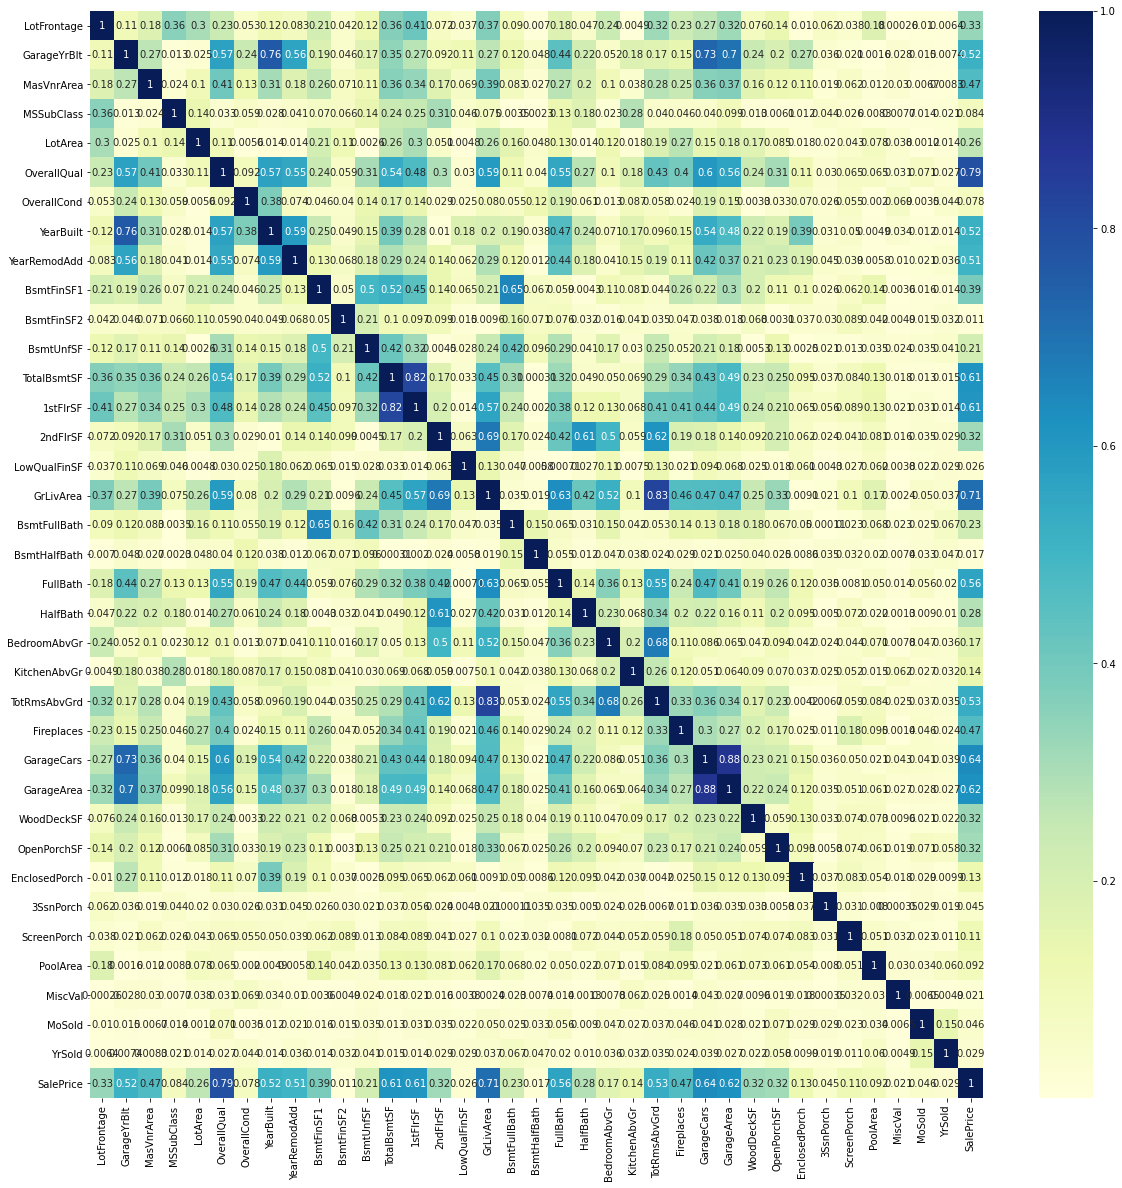

In [18]:
import seaborn as sns
plt.figure(figsize=(20,20))
corr_matrix=df_fill.corr().abs()
sns.heatmap(corr_matrix, cmap='YlGnBu' , annot=True)

In [19]:
#observations

#New features to test out
#SF related features> combine to form 'total_sf' and remove the consitutents - 'TotalBsmtSF','GrLivArea', other SF related features make up these two vairables hence remove
#combine bathrooms = from one feature and check for relationship - 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
#check whether breaking out other rooms from TotRmsAbvGrd will improve 'TotRmsAbvGrd' , 'BedroomAbvGr'
#combine out door areas to form outdoorSF by combining 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch','WoodDeckSF'

#garagecars and garagearea same thing, dropping garagearea and garagecars tad bid more related to salesprice

#yearremodeled and yearbuilt are same data, removed yearbuild and remove garageyearbuilt as related to prior, not meaningfully related to sale price

#garageyrbuilt drop due to correlation with yearremodelled

#MSSubClass is an object

#Other variable based on description and muilticolinearity will drop, will focus only on num variables with strong correlation as well as fundemental relationship with saleprice

num_features_drop = ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageCars','GarageYrBlt', 'YearBuilt','OverallCond',
                     'LowQualFinSF','PoolArea','MiscVal','KitchenAbvGr']
                
num_to_object =['MSSubClass','MoSold','YrSold']

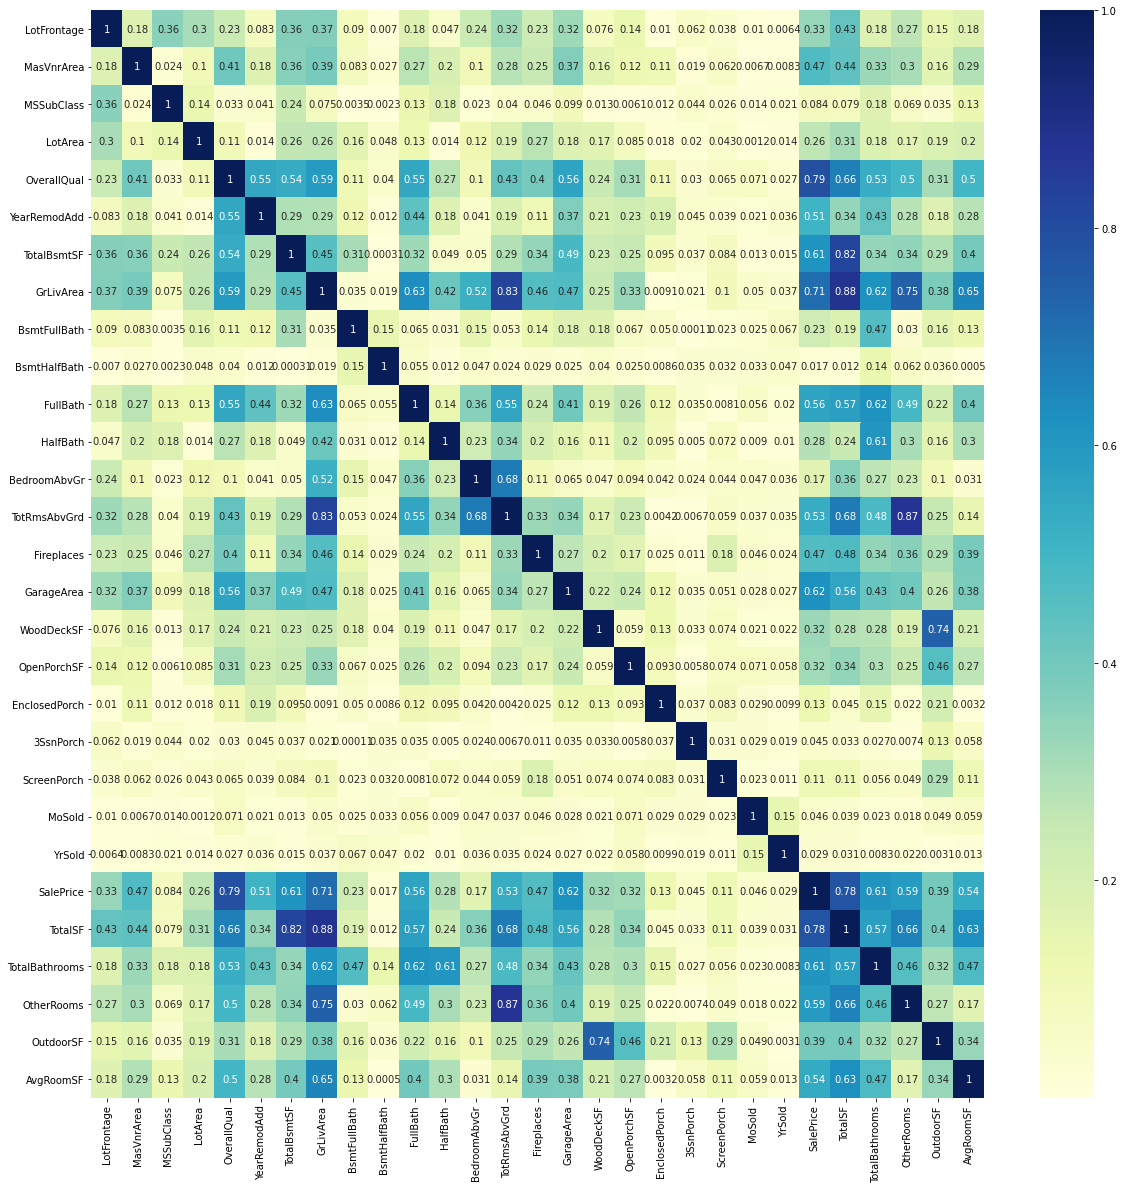

In [20]:
#experiment with new features
df_cleannum = df_fill.drop(num_features_drop, axis=1)
df_cleannum['TotalSF'] = df_cleannum[['TotalBsmtSF','GrLivArea']].sum(axis=1)
df_cleannum['TotalBathrooms'] = df_cleannum[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1)
df_cleannum['OtherRooms'] = df_cleannum['TotRmsAbvGrd'] - df_cleannum['BedroomAbvGr']
df_cleannum['OutdoorSF'] = df_cleannum[['OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch','WoodDeckSF']].sum(axis=1)
df_cleannum['AvgRoomSF'] = df_cleannum['GrLivArea'] / df_cleannum['TotRmsAbvGrd']
corr_matrix = df_cleannum.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

Oultlier Detection

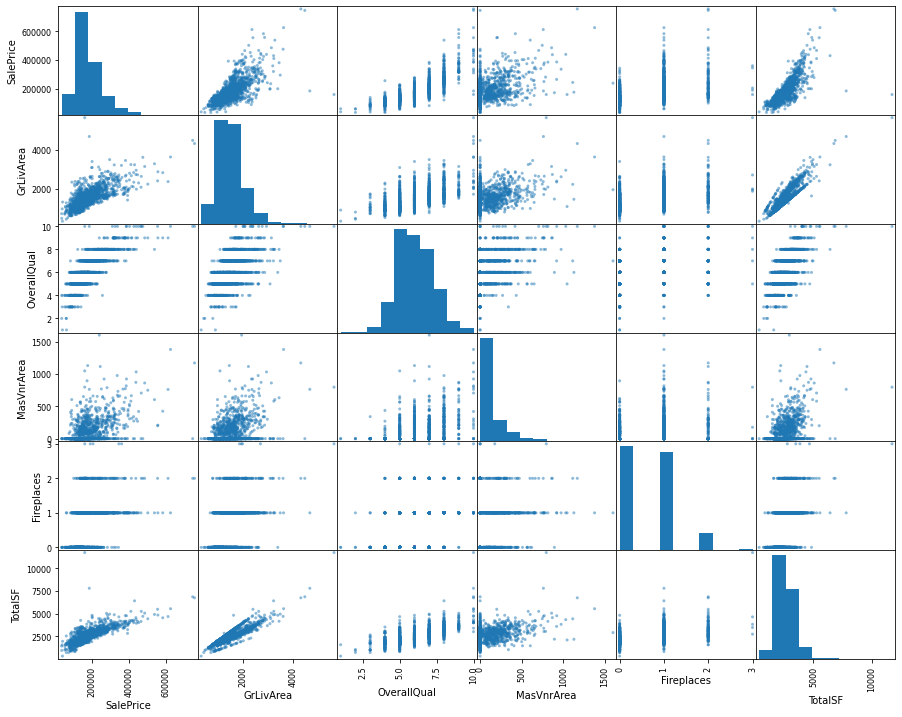

In [21]:
#run scatter plot with a few features highly correlated with SalePrice
from pandas.plotting import scatter_matrix
df_scatter = df_cleannum[['SalePrice','GrLivArea','OverallQual','MasVnrArea','Fireplaces', 'TotalSF']]
scatter_matrix(df_scatter,figsize=(15,12))
plt.show()

In [22]:
#two data points seem to be clear outliers when looking SalePrice vs both GrLivArea and OverallQaul
#filter dataset based on GRLivArea > 4000

df_cleannum[df_cleannum.SalePrice>700000]

,LotFrontage,MasVnrArea,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType,Electrical,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,OtherRooms,OutdoorSF,AvgRoomSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
692,104.0,1170.0,na,Ex,TA,Gd,GLQ,Unf,Ex,Attchd,Fin,TA,TA,na,na,na,BrkFace,SBrkr,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1995,Gable,WdShngl,HdBoard,HdBoard,Ex,TA,PConc,2444,GasA,Ex,Y,4316,0,1,3,1,4,Ex,10,Typ,2,832,Y,382,50,0,0,0,1,2007,WD,Normal,755000,6760,5,6,432,431.6
1183,160.0,0.0,na,Ex,TA,Av,GLQ,Unf,TA,Attchd,Fin,TA,TA,Ex,MnPrv,na,None,SBrkr,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1996,Hip,CompShg,Wd Sdng,ImStucc,Gd,TA,PConc,2396,GasA,Ex,Y,4476,1,0,3,1,4,Ex,10,Typ,2,813,Y,171,78,0,0,0,7,2007,WD,Abnorml,745000,6872,5,6,249,447.6


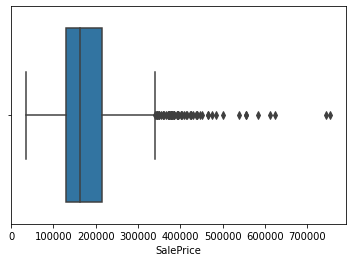

In [23]:
sns.boxplot(x='SalePrice', data=df_cleannum )

In [24]:
df_cleannum[df_cleannum.TotalSF>7000]

,LotFrontage,MasVnrArea,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType,Electrical,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,OtherRooms,OutdoorSF,AvgRoomSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,130.0,762.0,na,Ex,TA,Gd,GLQ,Unf,Gd,BuiltIn,Fin,TA,TA,na,na,na,Stone,SBrkr,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,3138,GasA,Ex,Y,4676,1,0,3,1,3,Ex,11,Typ,1,884,Y,208,406,0,0,0,10,2007,New,Partial,184750,7814,5,8,614,425.090909
1299,313.0,796.0,na,Ex,TA,Gd,GLQ,Unf,Gd,Attchd,Fin,TA,TA,Gd,na,na,Stone,SBrkr,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,2008,Hip,ClyTile,Stucco,Stucco,Ex,TA,PConc,6110,GasA,Ex,Y,5642,2,0,2,1,3,Ex,12,Typ,3,1418,Y,214,292,0,0,0,1,2008,New,Partial,160000,11752,5,9,506,470.166667


In [25]:
df_cleannum[df_cleannum['SalePrice']>700000]

,LotFrontage,MasVnrArea,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType,Electrical,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,OtherRooms,OutdoorSF,AvgRoomSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
692,104.0,1170.0,na,Ex,TA,Gd,GLQ,Unf,Ex,Attchd,Fin,TA,TA,na,na,na,BrkFace,SBrkr,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1995,Gable,WdShngl,HdBoard,HdBoard,Ex,TA,PConc,2444,GasA,Ex,Y,4316,0,1,3,1,4,Ex,10,Typ,2,832,Y,382,50,0,0,0,1,2007,WD,Normal,755000,6760,5,6,432,431.6
1183,160.0,0.0,na,Ex,TA,Av,GLQ,Unf,TA,Attchd,Fin,TA,TA,Ex,MnPrv,na,None,SBrkr,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1996,Hip,CompShg,Wd Sdng,ImStucc,Gd,TA,PConc,2396,GasA,Ex,Y,4476,1,0,3,1,4,Ex,10,Typ,2,813,Y,171,78,0,0,0,7,2007,WD,Abnorml,745000,6872,5,6,249,447.6


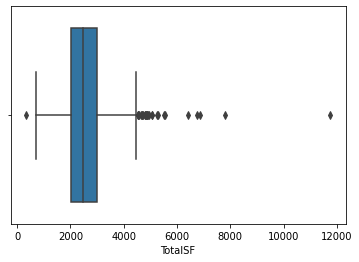

In [26]:
sns.boxplot(x='TotalSF', data=df_cleannum)

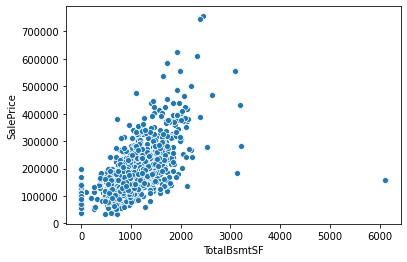

In [27]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_cleannum)

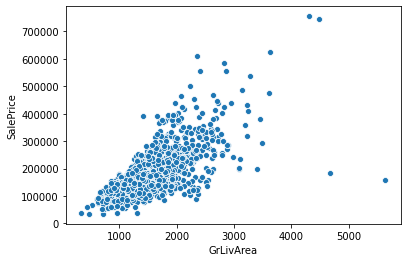

In [28]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleannum)

In [29]:
df_cleannum[df_cleannum['GrLivArea']>4000]

,LotFrontage,MasVnrArea,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType,Electrical,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,OtherRooms,OutdoorSF,AvgRoomSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,130.0,762.0,na,Ex,TA,Gd,GLQ,Unf,Gd,BuiltIn,Fin,TA,TA,na,na,na,Stone,SBrkr,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,3138,GasA,Ex,Y,4676,1,0,3,1,3,Ex,11,Typ,1,884,Y,208,406,0,0,0,10,2007,New,Partial,184750,7814,5,8,614,425.090909
692,104.0,1170.0,na,Ex,TA,Gd,GLQ,Unf,Ex,Attchd,Fin,TA,TA,na,na,na,BrkFace,SBrkr,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1995,Gable,WdShngl,HdBoard,HdBoard,Ex,TA,PConc,2444,GasA,Ex,Y,4316,0,1,3,1,4,Ex,10,Typ,2,832,Y,382,50,0,0,0,1,2007,WD,Normal,755000,6760,5,6,432,431.600000
1183,160.0,0.0,na,Ex,TA,Av,GLQ,Unf,TA,Attchd,Fin,TA,TA,Ex,MnPrv,na,None,SBrkr,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1996,Hip,CompShg,Wd Sdng,ImStucc,Gd,TA,PConc,2396,GasA,Ex,Y,4476,1,0,3,1,4,Ex,10,Typ,2,813,Y,171,78,0,0,0,7,2007,WD,Abnorml,745000,6872,5,6,249,447.600000
1299,313.0,796.0,na,Ex,TA,Gd,GLQ,Unf,Gd,Attchd,Fin,TA,TA,Gd,na,na,Stone,SBrkr,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,2008,Hip,ClyTile,Stucco,Stucco,Ex,TA,PConc,6110,GasA,Ex,Y,5642,2,0,2,1,3,Ex,12,Typ,3,1418,Y,214,292,0,0,0,1,2008,New,Partial,160000,11752,5,9,506,470.166667


In [30]:
data_issues = df_cleannum[df_cleannum['TotalBsmtSF'] > df_cleannum['GrLivArea']]
data_issues[data_issues['TotalBsmtSF'] / data_issues['GrLivArea'] > 1.05][['TotalBsmtSF', 'GrLivArea']]

,TotalBsmtSF,GrLivArea
Id,,
127,1078,958
154,1602,1252
333,3206,1629
441,3094,2402
1265,1405,1337
1299,6110,5642


In [31]:
#keeping SalePrice outliers as seems justified based on features, rerun after removing to see whether there will be an improvement
#data items to drop
outliers= [524, 1299, 692, 1183, 127, 154, 333, 441, 1265]
df_cleannum.drop(outliers, inplace=True)

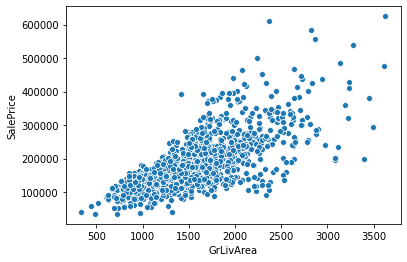

In [32]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleannum)

Checking for skewness

In [33]:
df_cleannum.skew(axis=0)

LotFrontage        1.720869
MasVnrArea         2.659025
MSSubClass         1.411285
LotArea           12.579470
OverallQual        0.175848
YearRemodAdd      -0.498348
TotalBsmtSF        0.345529
GrLivArea          0.835181
BsmtFullBath       0.597678
BsmtHalfBath       4.120681
FullBath           0.021561
HalfBath           0.678745
BedroomAbvGr       0.216390
TotRmsAbvGrd       0.661113
Fireplaces         0.635368
GarageArea         0.134775
WoodDeckSF         1.552932
OpenPorchSF        2.347317
EnclosedPorch      3.077668
3SsnPorch         10.271742
ScreenPorch        4.131438
MoSold             0.218230
YrSold             0.095410
SalePrice          1.536204
TotalSF            0.622558
TotalBathrooms     0.243966
OtherRooms         0.835844
OutdoorSF          1.111492
AvgRoomSF          0.610429
dtype: float64

###Categorical Variables

In [34]:
df_cleannum[num_to_object] = df_cleannum[num_to_object].astype(object)
cat_column_list = df_cleannum.select_dtypes('object').columns

In [35]:
cat_column_list

Index(['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'MasVnrType', 'Electrical', 'MSSubClass', 'MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'Functional', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
#determinie categorical encoding strategy 

#dropiing the following;

cat_features_drop = ['RoofStyle', 'ExterQual', 'BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual',
         'PoolQC','Fence','MiscFeature','SaleCondition','Exterior1st','Exterior2nd','MSSubClass']

#ordinal encoding
ordinal = ['Neighborhood','BldgType','HouseStyle','ExterCond',
           'BsmtQual','HeatingQC','CentralAir','FireplaceQu','GarageCond','PavedDrive']

#onehot encoding
one_hot = ['Foundation','BsmtCond','Heating','Electrical', 'RoofMatl','Functional','SaleType','MSZoning','Utilities','KitchenQual','MasVnrType',
           'Street', 'Alley','LandSlope', 'LandContour','Condition1', 'Condition2','LotShape', 'LotConfig','MoSold','YrSold']

#categoris to combine & onehot encode
Combine_cat = ['Street', 'Alley','LandSlope', 'LandContour','Condition1', 'Condition2','LotShape', 'LotConfig']
Access = ['Street', 'Alley']
LandChar = ['LandSlope', 'LandContour']
Proximitty = ['Condition1', 'Condition2']
LandProfile = ['LotShape', 'LotConfig']


len(cat_column_list) - len(ordinal + one_hot + cat_features_drop)

0

TA    733
Gd    584
Ex     95
Fa     39
Name: KitchenQual, dtype: int64

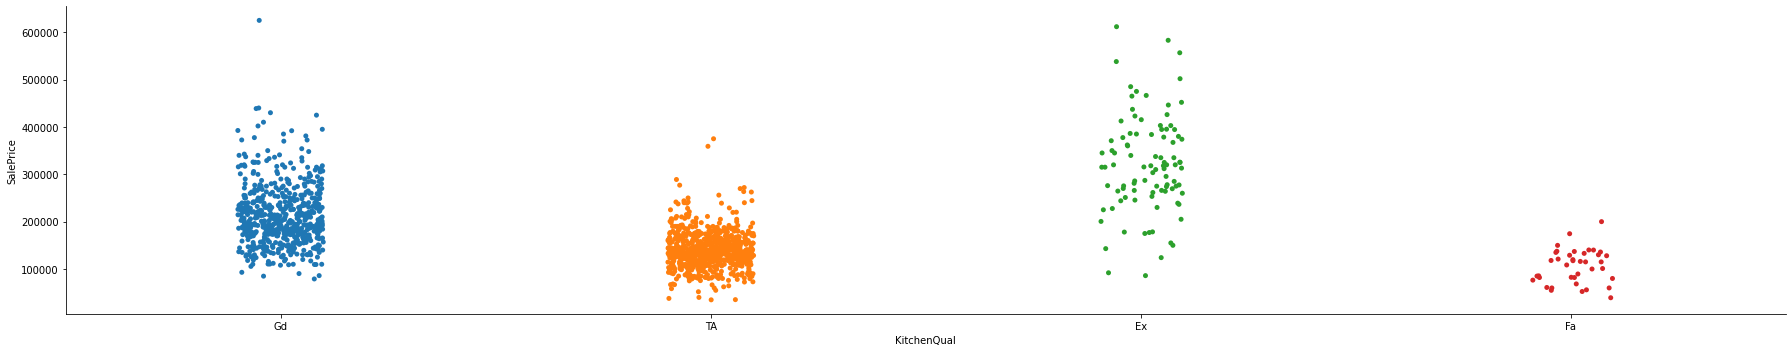

In [37]:
sns.catplot(x='KitchenQual', y='SalePrice', data=df_cleannum, height=5, aspect=5)
df_cleannum['KitchenQual'].value_counts()

In [38]:
df_test = df_cleannum.copy()

In [39]:
df_test['Access'] = df_test[['Street', 'Alley']].agg('_'.join, axis=1)
df_test['LandChar'] = df_test[['LandSlope', 'LandContour']].agg('_'.join, axis=1)
df_test['Proximitty'] = df_test[['Condition1', 'Condition2']].agg('_'.join, axis=1)
df_test['LandProfile'] = df_test[['LotShape', 'LotConfig']].agg('_'.join, axis=1)

Pave_na      1354
Pave_Grvl      50
Pave_Pave      41
Grvl_na         6
Name: Access, dtype: int64

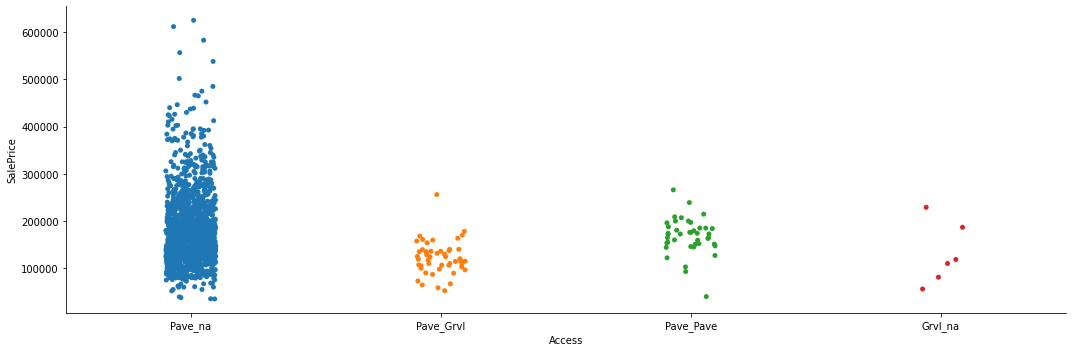

In [40]:
sns.catplot(x='Access', y='SalePrice', data=df_test, height=5, aspect=3)
df_test['Access'].value_counts()

Gtl_Lvl    1287
Gtl_Bnk      45
Gtl_HLS      32
Mod_Low      18
Mod_HLS      16
Mod_Lvl      16
Mod_Bnk      15
Gtl_Low       9
Sev_Low       9
Sev_HLS       2
Sev_Bnk       1
Sev_Lvl       1
Name: LandChar, dtype: int64

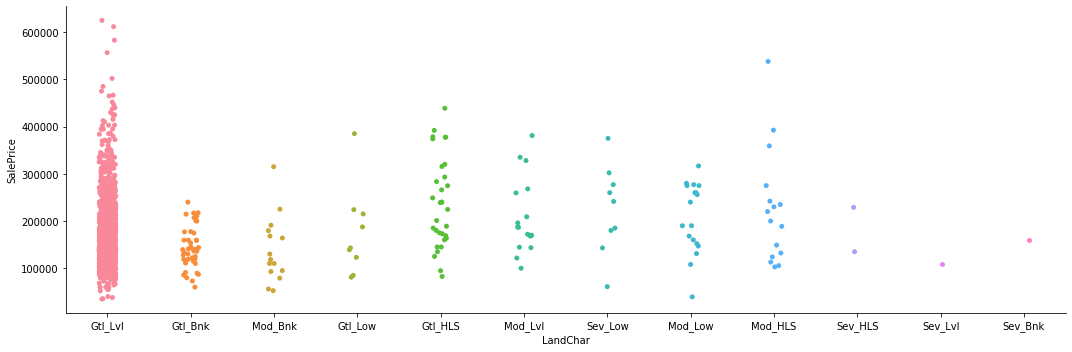

In [41]:
sns.catplot(x='LandChar', y='SalePrice', data=df_test, height=5, aspect=3)
df_test['LandChar'].value_counts()

Norm_Norm        1253
Feedr_Norm         75
Artery_Norm        45
RRAn_Norm          22
PosN_Norm          17
RRAe_Norm          11
PosA_Norm           8
RRNn_Norm           4
RRAn_Feedr          4
RRNe_Norm           2
Artery_Artery       2
Feedr_RRNn          2
RRNn_Feedr          1
Feedr_Feedr         1
Artery_PosA         1
Feedr_RRAn          1
PosN_PosN           1
Feedr_RRAe          1
Name: Proximitty, dtype: int64

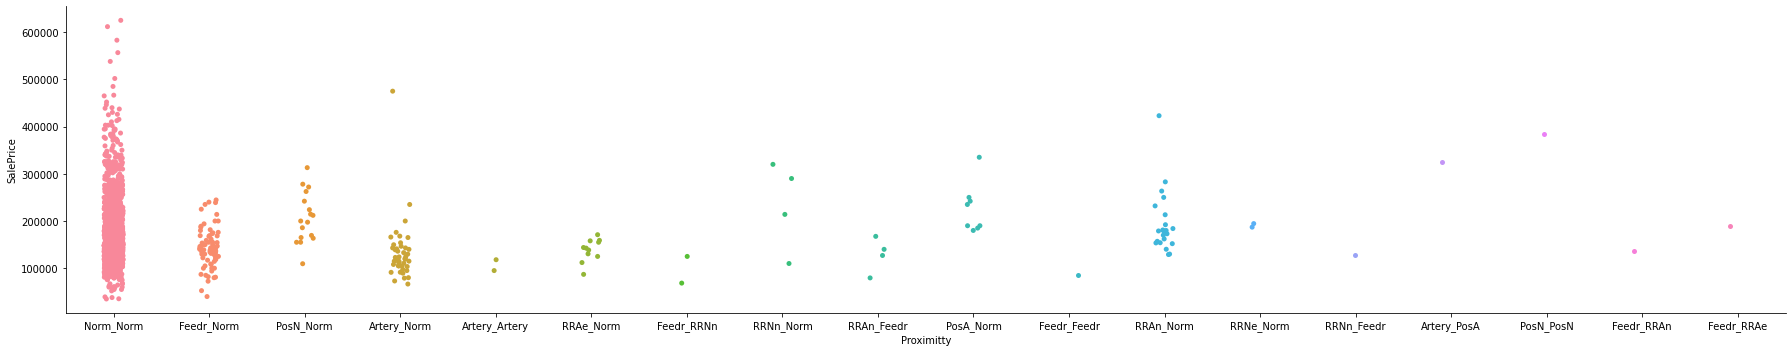

In [42]:
sns.catplot(x='Proximitty', y='SalePrice', data=df_test, height=5, aspect=5)
df_test['Proximitty'].value_counts()

Reg_Inside     745
IR1_Inside     281
Reg_Corner     146
IR1_Corner     105
IR1_CulDSac     77
Reg_FR2         27
IR1_FR2         15
IR2_Inside      14
IR2_CulDSac     14
IR2_Corner       8
IR3_Inside       6
IR2_FR2          5
Reg_FR3          3
IR3_CulDSac      2
IR1_FR3          1
Reg_CulDSac      1
IR3_Corner       1
Name: LandProfile, dtype: int64

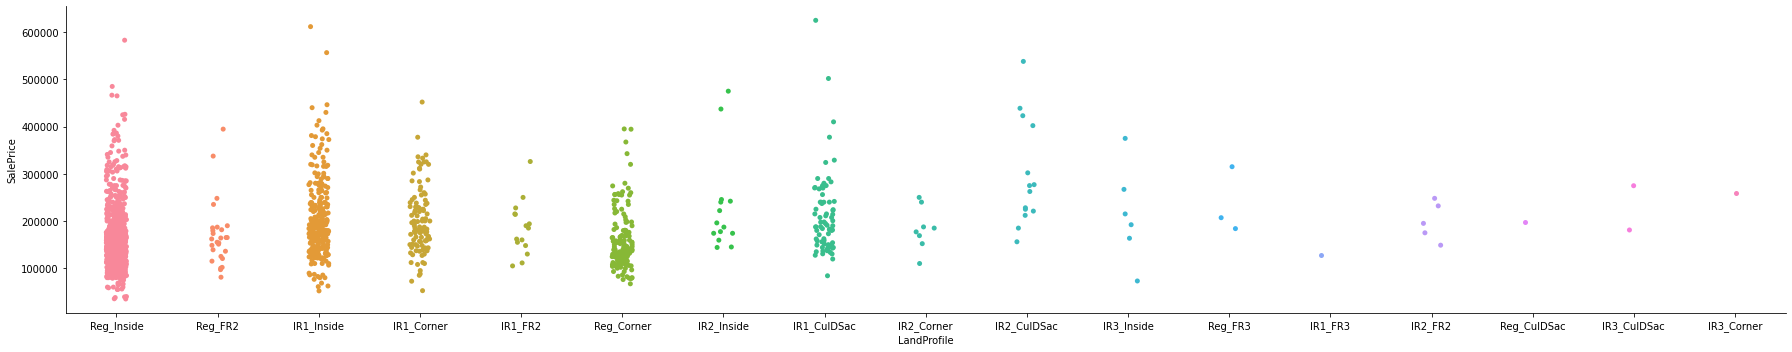

In [43]:
sns.catplot(x='LandProfile', y='SalePrice', data=df_test, height=5, aspect=5)
df_test['LandProfile'].value_counts()

##Data Preparation

Defining X & y

In [44]:
df.drop(outliers, inplace=True)

In [45]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice'].copy()

In [46]:
X.shape

(1451, 79)

Num and Cat feature list

In [47]:
X[num_to_object] = X[num_to_object].astype('object')

In [48]:
#get num and categorical columns lists
num_feature_list = list(X.select_dtypes('number').columns)
cat_feature_list = list(set(X.columns)-set(num_feature_list))

In [49]:
#remove the columns to drop
num_feature_list = list(set(num_feature_list) - set(num_features_drop))
cat_feature_list = list(set(cat_feature_list) - set(cat_features_drop))

Train and test set split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Organization

*Categorical Features*

In [51]:
ordinal_na = [cat for cat in na_cat if cat in ordinal]
ordinal_balance = list(set(ordinal) - set(ordinal_na))
onehot_na = [cat for cat in na_cat if cat in one_hot and Combine_cat]
onehot_frequent = [cat for cat in frequent_cat if cat in one_hot and Combine_cat]
onehot_balance = list(set(one_hot) - set(onehot_na + onehot_frequent))
one_hot_all = onehot_na + onehot_frequent + onehot_balance
len(cat_feature_list) == len(ordinal_na + ordinal_balance + onehot_na + onehot_frequent + onehot_balance)

True

*Numerical Features*

In [52]:
num_frequant = [num for num in frequent_num if num in num_feature_list]
num_constant = [num for num in constant if num in num_feature_list]
num_median = list(set(num_feature_list) - set(num_frequant + num_constant))

#setup pipeline with processing as per this sequence of features
num_feature_list = num_frequant + num_constant + num_median

Creating custom transformers

In [53]:
#custom feature selector
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureSelector(BaseEstimator, TransformerMixin):
  def __init__(self, feature_names):
    self._feature_names=feature_names

  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    return X[self._feature_names]

In [54]:
#setup custom feature addition - num features

TotalBsmtSF_ix= X_train[num_feature_list].columns.get_loc('TotalBsmtSF')
GrLivArea_ix= X_train[num_feature_list].columns.get_loc('GrLivArea')
BsmtFullBath_ix= X_train[num_feature_list].columns.get_loc('BsmtFullBath')
BsmtHalfBath_ix= X_train[num_feature_list].columns.get_loc('BsmtHalfBath')
Fullbath_ix= X_train[num_feature_list].columns.get_loc('FullBath')
Halfbath_ix= X_train[num_feature_list].columns.get_loc('HalfBath')
BedroomAbvGr_ix = X_train[num_feature_list].columns.get_loc('BedroomAbvGr')
TotRmsAbvGrd_ix = X_train[num_feature_list].columns.get_loc('TotRmsAbvGrd')
OpenPorchSF_ix = X_train[num_feature_list].columns.get_loc('OpenPorchSF')
EnclosedPorch_ix = X_train[num_feature_list].columns.get_loc('EnclosedPorch')
SsnPorch_ix = X_train[num_feature_list].columns.get_loc('3SsnPorch')
ScreenPorch_ix = X_train[num_feature_list].columns.get_loc('ScreenPorch')
WoodDeckSF_ix = X_train[num_feature_list].columns.get_loc('WoodDeckSF')


class CustomFeatureAdditionNum(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    totalSF = X[:, TotalBsmtSF_ix] + X[:,GrLivArea_ix]
    totalbaths = X[:, BsmtFullBath_ix] + X[:, BsmtHalfBath_ix] + X[:, Fullbath_ix] + X[:,Halfbath_ix]
    otherrooms = X[:, TotRmsAbvGrd_ix] - X[:, BedroomAbvGr_ix]
    outdoorSF = X[: , OpenPorchSF_ix] + X[: , EnclosedPorch_ix] + X[: , SsnPorch_ix] + X[: , ScreenPorch_ix] + X[: , WoodDeckSF_ix]
    avgroomSF = X[: ,GrLivArea_ix] / X[:, TotRmsAbvGrd_ix]
    X=np.delete(X, [TotalBsmtSF_ix, GrLivArea_ix, BsmtFullBath_ix, BsmtHalfBath_ix, Fullbath_ix, Halfbath_ix, TotRmsAbvGrd_ix, OpenPorchSF_ix,
                    EnclosedPorch_ix, SsnPorch_ix, ScreenPorch_ix, WoodDeckSF_ix] , axis=1)
    return np.c_[X, totalSF, totalbaths, otherrooms, outdoorSF, avgroomSF]

#correcting skewness

class LogTransform(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    X_log = np.log1p(X)
    return X_log

In [55]:
#setup custom feature addition - cat features
Access = ['Street', 'Alley']
LandChar = ['LandSlope', 'LandContour']
Proximitty = ['Condition1', 'Condition2']
LandProfile = ['LotShape', 'LotConfig']

Street_ix = X_train[one_hot_all].columns.get_loc('Street')
Alley_ix = X_train[one_hot_all].columns.get_loc('Alley')
LandSlope_ix = X_train[one_hot_all].columns.get_loc('LandSlope')
LandContour_ix = X_train[one_hot_all].columns.get_loc('LandContour')
Condition1_ix = X_train[one_hot_all].columns.get_loc('Condition1')
Condition2_ix = X_train[one_hot_all].columns.get_loc('Condition2')
LotShape_ix = X_train[one_hot_all].columns.get_loc('LotShape')
LotConfig_ix = X_train[one_hot_all].columns.get_loc('LotConfig')



class CustomFeatureAdditionCat(BaseEstimator,TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    street = X[:, Street_ix].astype('str')
    alley = X[:, Alley_ix].astype('str')
    slope = X[:, LandSlope_ix].astype('str')
    contour = X[:, LandContour_ix].astype('str')
    condition1 = X[:, Condition1_ix].astype('str')
    condition2 = X[:, Condition2_ix].astype('str')
    lotshape = X[:, LotShape_ix].astype('str')
    lotconfig = X[:, LotConfig_ix].astype('str')
    LandChar = np.char.add(slope, contour)
    Access = np.char.add(street, alley)
    Proximity = np.char.add(condition1, condition2)
    LandProfile = np.char.add(lotshape, lotconfig)
    X = np.delete(X, [Street_ix, Alley_ix, LandSlope_ix, LandContour_ix, Condition1_ix, Condition2_ix, LotShape_ix, LotConfig_ix], axis=1)
    return np.c_[X, LandChar, Access, Proximity, LandProfile]

Setting up pipelines

In [56]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [57]:
#onehot_columntransformer
onehot_transformer = ColumnTransformer([('constant_onehot', SimpleImputer(strategy ='constant', fill_value='na'),onehot_na),
                                        ('frequent_onehot', SimpleImputer(strategy='most_frequent'), onehot_frequent),
                                        ('balance_onehot', SimpleImputer(strategy='most_frequent'), onehot_balance)],
                                       remainder='passthrough')
                                     
#cat pipelines
ordinal_pipeline = Pipeline([('catordinal_column_selection', CustomFeatureSelector(ordinal)),
                             ('fill_NanOrdConstant', SimpleImputer(strategy='constant', fill_value='na')),
                             ('ordinal_encode', OrdinalEncoder()),
                             ('std_cat', StandardScaler())])

onehot_pipeline = Pipeline([('catonehot_column_selection', CustomFeatureSelector(one_hot_all)),
                            ('onehot_transformer', onehot_transformer),
                            ('catcustom_feature', CustomFeatureAdditionCat()),
                            ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))])

#num transformer
num_transformer = ColumnTransformer([('frequent_impute', SimpleImputer(strategy='most_frequent'), num_frequant),
                            ('constant_num', SimpleImputer(strategy='constant', fill_value=1900), num_constant),
                            ('median_num', SimpleImputer(strategy='median'), num_median)])

#num pipeline
num_pipeline = Pipeline([('num_column_selection', CustomFeatureSelector(num_feature_list)),
                        ('num_tranformer', num_transformer),
                        ('custom_features', CustomFeatureAdditionNum()),
                        ('log_transform', LogTransform()),
                        ('std_num', StandardScaler())])

#combining pipeline
pre_process = FeatureUnion([('ordinal_pipeline', ordinal_pipeline),
                            ('onehot_pipeline', onehot_pipeline),
                            ('num_pipeline', num_pipeline)])

Pre_processing the Training and Test Set

In [58]:
#fitting to full training - missing categorical vairable, can't initiate 'ignore' as dropping first columsn in onehot encoding to avoid multicolenearity
X_prepared_train = pre_process.fit_transform(X_train)
X_prepared_test = pre_process.transform(X_test)

# Checking to ensure shapes of processed train and test set is equal due to uneven spread of cat data between test and training set
print(X_prepared_train.shape[1] == X_prepared_test.shape[1])

#log_transform y(SalePrice)
y_train_log = np.log1p(y_train)

True


In [59]:
X_prepared_train.shape

(1160, 148)

MODEL BUILDING AND TESTING

In [60]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
np.set_printoptions(precision=3)

In [61]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [62]:
def rmse_model(y_train, y_pred):
  mse = mean_squared_error(y_train, y_pred)
  rmse = np.sqrt(mse)
  return rmse

In [63]:
def crossvalscores(model, X, y, cv):
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv=cv)
  # scores = np.expm1(scores)
  scores = np.sqrt(-scores)
  print('Scores : ', scores)
  print('Mean : ', scores.mean())
  print('StdD : ', scores.std())

In [64]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

ElasticNet

In [65]:
from sklearn.linear_model import ElasticNet

enet_reg = ElasticNet(l1_ratio=0)
enet_reg.fit(X_prepared_train, y_train_log)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.55889683039569, tolerance: 0.018618755358912605
  max_iter, tol, rng, random, positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
y_pred = np.expm1(enet_reg.predict(X_prepared_train))

In [67]:
rmse_model(y_train, y_pred)

33700.691783119626

In [68]:
crossvalscores(enet_reg, X_prepared_train, y_train, 20)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1088639507259.9092, tolerance: 669652664.1160283
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1057171424544.485, tolerance: 656245717.566179
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096535850831.598, tolerance: 683884235.8533279
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not conv

Scores :  [34320.39 47775.44 29977.20 34848.33 42119.79 38461.96 36368.06 31702.91
 26970.19 23645.69 53223.88 25410.22 30787.59 33021.80 33875.32 46411.36
 34248.92 28449.94 32213.13 53787.91]
Mean :  35881.00178843261
StdD :  8436.984423373595


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040203239372.9875, tolerance: 651120021.3923467
  max_iter, tol, rng, random, positive)


SGD Regressio

In [69]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss='huber')
sgd_reg.fit(X_prepared_train, y_train_log)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [70]:
y_pred=sgd_reg.predict(X_prepared_train)

In [71]:
rmse_model(y_train_log, y_pred)

0.8079133405133128

In [72]:
crossvalscores(sgd_reg, X_prepared_train, y_train_log, cv=10)

Scores :  [0.87 0.94 0.85 0.86 0.87 0.86 0.91 0.72 0.74 0.84]
Mean :  0.8449300178658987
StdD :  0.06342988661723922


SVR

In [73]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear')
svr_reg.fit(X_prepared_train, y_train_log)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
y_pred= svr_reg.predict(X_prepared_train)
# y_pred= np.expm1(y_pred)

In [75]:
rmse_model(y_train_log, y_pred)

0.11670909436329276

In [76]:
crossvalscores(svr_reg, X_prepared_train, y_train_log, 10)

Scores :  [0.14 0.13 0.16 0.13 0.13 0.14 0.14 0.12 0.12 0.12]
Mean :  0.1327409981392944
StdD :  0.010638316983665654


In [77]:
y_pred = svr_reg.predict(X_prepared_test)
rmse_model(y_test, np.expm1(y_pred))

21350.8912111748

Decision Tree Model

In [78]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=8)

In [79]:
tree_reg.fit(X_prepared_train, y_train_log)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [80]:
tree_rmse = np.sqrt(mean_squared_error(y_train_log, tree_reg.predict(X_prepared_train)))
tree_rmse

0.08945305990550387

In [81]:
crossvalscores(tree_reg, X_prepared_train, y_train_log, 10)

Scores :  [0.20 0.19 0.24 0.16 0.21 0.19 0.19 0.18 0.18 0.23]
Mean :  0.19676744627672865
StdD :  0.022660963184954343


Random Forests

In [82]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [83]:
forest_reg.fit(X_prepared_train, y_train_log)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
y_pred = forest_reg.predict(X_prepared_train)

In [85]:
rmse_model(y_train_log, y_pred)

0.05445866381821691

In [86]:
crossvalscores(forest_reg, X_prepared_train, y_train_log, 10)

Scores :  [0.16 0.15 0.16 0.12 0.14 0.15 0.14 0.14 0.13 0.16]
Mean :  0.14322654407524277
StdD :  0.013276798962192192


XG Boost

In [87]:
from xgboost import XGBRFRegressor
xgb_reg = XGBRFRegressor(n_estimators=10, max_depth=5)

In [88]:
xgb_reg.fit(X_prepared_train, y_train_log)

[00:52:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [89]:
y_pred = xgb_reg.predict(X_prepared_train)

In [90]:
rmse_model(y_train_log, y_pred)

0.400763512712504

In [91]:
crossvalscores(xgb_reg, X_prepared_train, y_train_log, 10)

[00:52:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GradientBoosRegressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(random_state=0)

In [93]:
gbr_reg.fit(X_prepared_train, y_train_log)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
y_pred = gbr_reg.predict(X_prepared_train)

In [95]:
rmse_model(y_train_log, y_pred)

0.09043955640589167

In [96]:
crossvalscores(gbr_reg, X_prepared_train, y_train_log, 10)

Scores :  [0.15 0.13 0.14 0.12 0.12 0.14 0.13 0.13 0.11 0.13]
Mean :  0.13139595125321354
StdD :  0.009735166194135315


In [97]:
y_pred = np.expm1(y_pred)
rmse_model(y_train, y_pred)

16575.645364731456

In [98]:
y_test_pred = gbr_reg.predict(X_prepared_test)

In [99]:
y_test_pred = np.expm1(y_test_pred)

In [100]:
rmse_model(y_test, y_test_pred)

19858.834420599804

Finetuninig - Gradient Boost

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = [{'n_estimators':[139,140,141], 'max_depth':[2,3,4], 'min_samples_split':[2,3], 'min_samples_leaf':[4,5,6]}]

In [103]:
grid_search = GridSearchCV(gbr_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True)

In [104]:
grid_search.fit(X_prepared_train, y_train_log)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [105]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.1308947803628641 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 139}
0.13093944885251887 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 140}
0.13091629611196595 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 141}
0.1308947803628641 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 139}
0.13093944885251887 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 140}
0.13091629611196595 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 141}
0.13048160186566216 {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 139}
0.13043579343396963 {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 140}
0.1304572963132236 {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 141}
0.13048160186566216 {'max_depth': 2, 'min_samples_leaf': 5

In [106]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 140}

In [107]:
# feature_importances = grid_search.best_estimator_.feature_importances_

In [108]:
# sorted(zip(feature_importances, final_feature_list), reverse=True)

In [109]:
final_model = grid_search.best_estimator_

In [110]:
y_pred = final_model.predict(X_prepared_train)
rmse_model(y_train_log, y_pred)

0.10527049823736705

In [111]:
crossvalscores(final_model, X_prepared_train, y_train_log, cv=10)

Scores :  [0.15 0.13 0.14 0.12 0.13 0.14 0.13 0.12 0.12 0.13]
Mean :  0.13066062073417514
StdD :  0.00835626003183068


In [112]:
y_test_pred = final_model.predict(X_prepared_test)
rmse_model(y_test, np.expm1(y_test_pred))

19726.84254845863

Fine Tuning SVR Model

In [113]:
# param_grid = [{'C':[0.3,0.4,0.5], 'epsilon':[.03, .035, 0.04], 'gamma':[.015, 0.02, 0.025]}] 'epsilon':[.037, .04, 0.045]

In [189]:
param_grid = [{'C':[0.1, 0.15, 0.2], 'kernel':['rbf', 'linear'], 'epsilon':[.040, .045, 0.0475], 'gamma':[.010, 0.015, 0.02]}]

In [190]:
grid_search = GridSearchCV(svr_reg, param_grid, scoring='neg_mean_squared_error', cv=10, return_train_score=True)

In [191]:
grid_search.fit(X_prepared_train, y_train_log)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.15, 0.2],
                          'epsilon': [0.04, 0.045, 0.0475],
                          'gamma': [0.015, 0.02, 0.025],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [192]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

0.14719490447971334 {'C': 0.1, 'epsilon': 0.04, 'gamma': 0.015, 'kernel': 'rbf'}
0.13085204587177424 {'C': 0.1, 'epsilon': 0.04, 'gamma': 0.015, 'kernel': 'linear'}
0.1513539450750587 {'C': 0.1, 'epsilon': 0.04, 'gamma': 0.02, 'kernel': 'rbf'}
0.13085204587177424 {'C': 0.1, 'epsilon': 0.04, 'gamma': 0.02, 'kernel': 'linear'}
0.15667277645811972 {'C': 0.1, 'epsilon': 0.04, 'gamma': 0.025, 'kernel': 'rbf'}
0.13085204587177424 {'C': 0.1, 'epsilon': 0.04, 'gamma': 0.025, 'kernel': 'linear'}
0.1474954531409497 {'C': 0.1, 'epsilon': 0.045, 'gamma': 0.015, 'kernel': 'rbf'}
0.13101965000659602 {'C': 0.1, 'epsilon': 0.045, 'gamma': 0.015, 'kernel': 'linear'}
0.15161913350358786 {'C': 0.1, 'epsilon': 0.045, 'gamma': 0.02, 'kernel': 'rbf'}
0.13101965000659602 {'C': 0.1, 'epsilon': 0.045, 'gamma': 0.02, 'kernel': 'linear'}
0.15704099768640647 {'C': 0.1, 'epsilon': 0.045, 'gamma': 0.025, 'kernel': 'rbf'}
0.13101965000659602 {'C': 0.1, 'epsilon': 0.045, 'gamma': 0.025, 'kernel': 'linear'}
0.14767546

In [194]:
grid_search.best_params_

{'C': 0.15, 'epsilon': 0.045, 'gamma': 0.015, 'kernel': 'linear'}

In [195]:
svr_final = grid_search.best_estimator_

In [196]:
svr_final.fit(X_prepared_train, y_train_log)

SVR(C=0.15, cache_size=200, coef0=0.0, degree=3, epsilon=0.045, gamma=0.015,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [197]:
y_pred = svr_final.predict(X_prepared_train)

In [198]:
rmse_model(y_train_log, y_pred)

0.11775233970820387

In [199]:
crossvalscores(svr_final, X_prepared_train, y_train_log, cv=10)

Scores :  [0.14 0.13 0.15 0.13 0.12 0.13 0.13 0.12 0.12 0.12]
Mean :  0.13029097943897253
StdD :  0.010240572007837305


In [200]:
y_pred = svr_final.predict(X_prepared_test)
rmse_model(y_test, np.expm1(y_pred))

21822.579715496973

Stacking

In [125]:
from sklearn.ensemble import StackingRegressor

In [ ]:
# models = [('svr', SVR(kernel='linear', C=0.5, epsilon=0.03, gamma=0.015)), ('gbr', GradientBoostingRegressor(max_depth=2, n_estimators=140, min_samples_split=2, min_samples_leaf=5))]
# stacked_regressor = StackingRegressor(estimators=models,cv=10)

In [201]:
models = [('svr', SVR(kernel='linear', C=0.15, epsilon=0.045, gamma=0.015)), ('gbr', GradientBoostingRegressor(max_depth=2, n_estimators=140, min_samples_split=2, min_samples_leaf=5))]
stacked_regressor = StackingRegressor(estimators=models,cv=10)

In [202]:
stacked_regressor.fit(X_prepared_train, y_train_log)

StackingRegressor(cv=10,
                  estimators=[('svr',
                               SVR(C=0.15, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.045, gamma=0.015, kernel='linear',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False)),
                              ('gbr',
                               GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
          

In [203]:
y_pred = stacked_regressor.predict(X_prepared_train)

In [204]:
rmse_model(y_train_log, y_pred)

0.10586820125646253

In [205]:
y_test_pred = np.expm1(stacked_regressor.predict(X_prepared_test))
rmse_model(y_test, y_test_pred)

18968.56205381804

Predicting on the test set

In [131]:
# #read test set for final prediction
# X_testset = pd.read_csv('test.csv')
# X_testset[num_to_object] = X_testset[num_to_object].astype('object')
# X_testset.shape

# #drop redundent columns set index to ID
# # X_testset.drop(drop_list, axis=1, inplace=True)
# # X_testset.shape
# X_testset.set_index('Id', inplace=True)

# #preprocess
# X_prepared_testset = pre_process.transform(X_testset)

# #predict
# y_testset_pred = np.expm1(stacked_regressor.predict(X_prepared_testset))

# #prepare result and write to CSV
# y_testset_predreshape = np.reshape(y_testset_pred, (len(y_testset_pred),1))
# y_testset_preddf = pd.DataFrame(y_testset_predreshape, columns=['SalePrice'])
# y_testset_preddf.set_index(X_testset.index,inplace=True)
# y_testset_preddf.to_csv('test_submission.csv')